In [70]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [71]:
img = cv2.imread('./interpolation/Snoopy-small.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [72]:
# 定义放大倍数
scale = 10

# 获取原图像的宽和高
h, w = img.shape[:2]

# 定义目标图像的宽和高
new_h, new_w = h * scale, w * scale

In [73]:
# 计算横向和纵向上的缩放比例
ratio_h = new_h / h
ratio_w = new_w / w

In [74]:
# 创建目标图像数组
dst1 = np.zeros((new_h, new_w, 3), dtype=np.uint8)

In [76]:
# 最近邻插值
for i in range(new_h):
    for j in range(new_w):
        src_x = min(max(round(j / ratio_w), 0), w - 1)
        src_y = min(max(round(i / ratio_h), 0), h - 1)
        dst1[i, j] = img[src_y, src_x]

In [ ]:
# # 最近邻法放大
# dst1 = cv2.resize(img, (800, 600), interpolation=cv2.INTER_NEAREST)
# dst1.shape

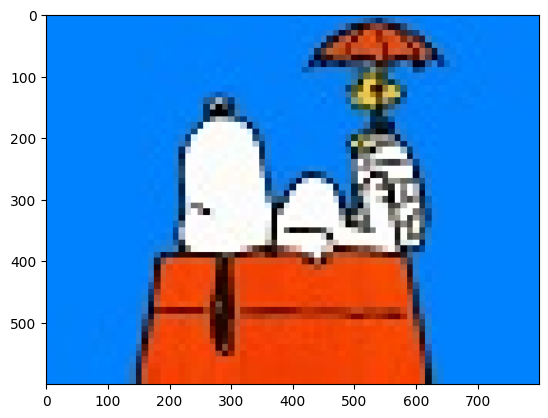

In [77]:
plt.imshow(dst1)

In [ ]:
def bilinear_interpolation(x, y, p1, p2, p3, p4):
    r = (p1[2][0] * (p3[0] - x) * (p4[1] - y) +
            p3[2][0] * (x - p1[0]) * (p4[1] - y) +
            p2[2][0] * (p4[0] - x) * (y - p1[1]) +
            p4[2][0] * (x - p2[0]) * (y - p1[1])) / ((p3[0] - p1[0]) * (p4[1] - p1[1]) + 1e-10)
    g = (p1[2][1] * (p3[0] - x) * (p4[1] - y) +
            p3[2][1] * (x - p1[0]) * (p4[1] - y) +
            p2[2][1] * (p4[0] - x) * (y - p1[1]) +
            p4[2][1] * (x - p2[0]) * (y - p1[1])) / ((p3[0] - p1[0]) * (p4[1] - p1[1]) + 1e-10)
    b = (p1[2][2] * (p3[0] - x) * (p4[1] - y) +
            p3[2][2] * (x - p1[0]) * (p4[1] - y) +
            p2[2][2] * (p4[0] - x) * (y - p1[1]) +
            p4[2][2] * (x - p2[0]) * (y - p1[1])) / ((p3[0] - p1[0]) * (p4[1] - p1[1]) + 1e-10)
    return (int(r), int(g), int(b))

In [ ]:
# 双线性插值法放大

# 定义目标图像的数组
dst2 = np.zeros((new_h, new_w, 3), dtype=np.uint8)

# 双线性插值法放大
for i in range(new_h):
    for j in range(new_w):
        src_x = i / scale
        src_y = j / scale
        x1 = int(src_x)
        x2 = x1 + 1
        y1 = int(src_y)
        y2 = y1 + 1
        if x2 >= h:
            x2 = h - 1
        if y2 >= w:
            y2 = w - 1
        p1 = (x1, y1, img[x1, y1])
        p2 = (x1, y2, img[x1, y2])
        p3 = (x2, y1, img[x2, y1])
        p4 = (x2, y2, img[x2, y2])
        pixel = bilinear_interpolation(src_x, src_y, p1, p2, p3, p4)
        dst2[i, j] = pixel

In [ ]:
plt.imshow(dst2)

In [ ]:
ori_img = cv2.imread('./interpolation/Snoopy-original.jpg')
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(ori_img)